# Visualizacion

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scripts.data as data

analysis_data = data.load_analysis_data()
analysis_data.head()

,,Temp,HumMin,HumMax,HumMean
Year,Month,,,,
1991,Enero,24.0,21.0,99.0,NaN
1992,Enero,23.9,32.0,100.0,NaN
1993,Enero,25.7,25.0,99.0,NaN
1994,Enero,23.5,26.0,99.0,NaN
1995,Enero,24.3,21.0,99.0,NaN


### Evolucion de la Temperatura Promedio

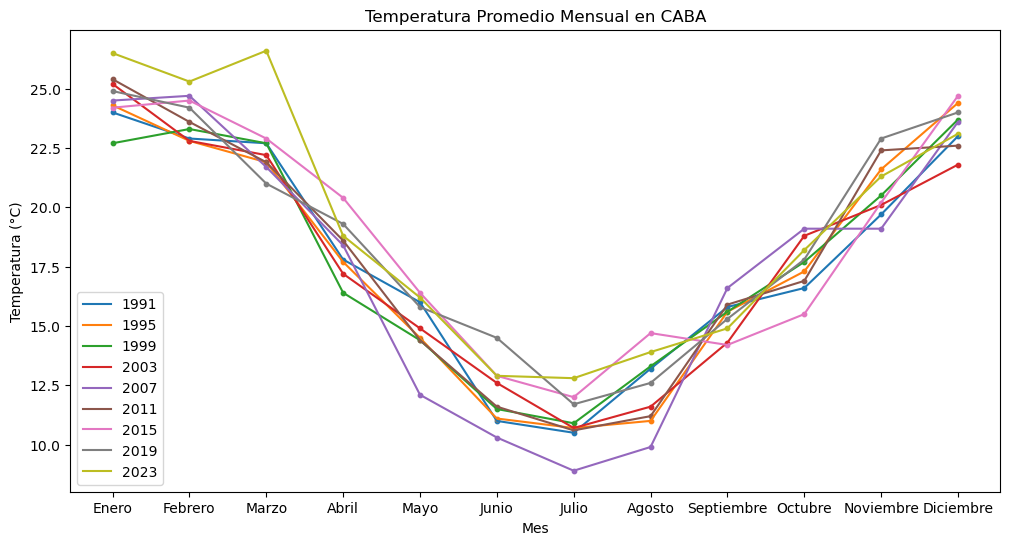

In [2]:
temperatures = analysis_data[["Temp"]]

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

ax.set_title("Temperatura Promedio Mensual en CABA")
ax.set_ylabel("Temperatura (°C)")
ax.set_xlabel("Mes")

target_years = range(1991, 2024, 4)
for year, temp in temperatures.groupby("Year"):
    if year not in target_years:
        continue

    months = temp.index.get_level_values(1)
    ax.plot(months, temp["Temp"], label=year)
    ax.scatter(months, temp["Temp"], s=10)

ax.legend()
plt.show()

Graficando la temperatura promedio mensual, se puede observar claramente la
caracteristica estacional (cíclica) de la temperatura durante el transcurso de un año.

### Tendencia de la Temperatura Promedio

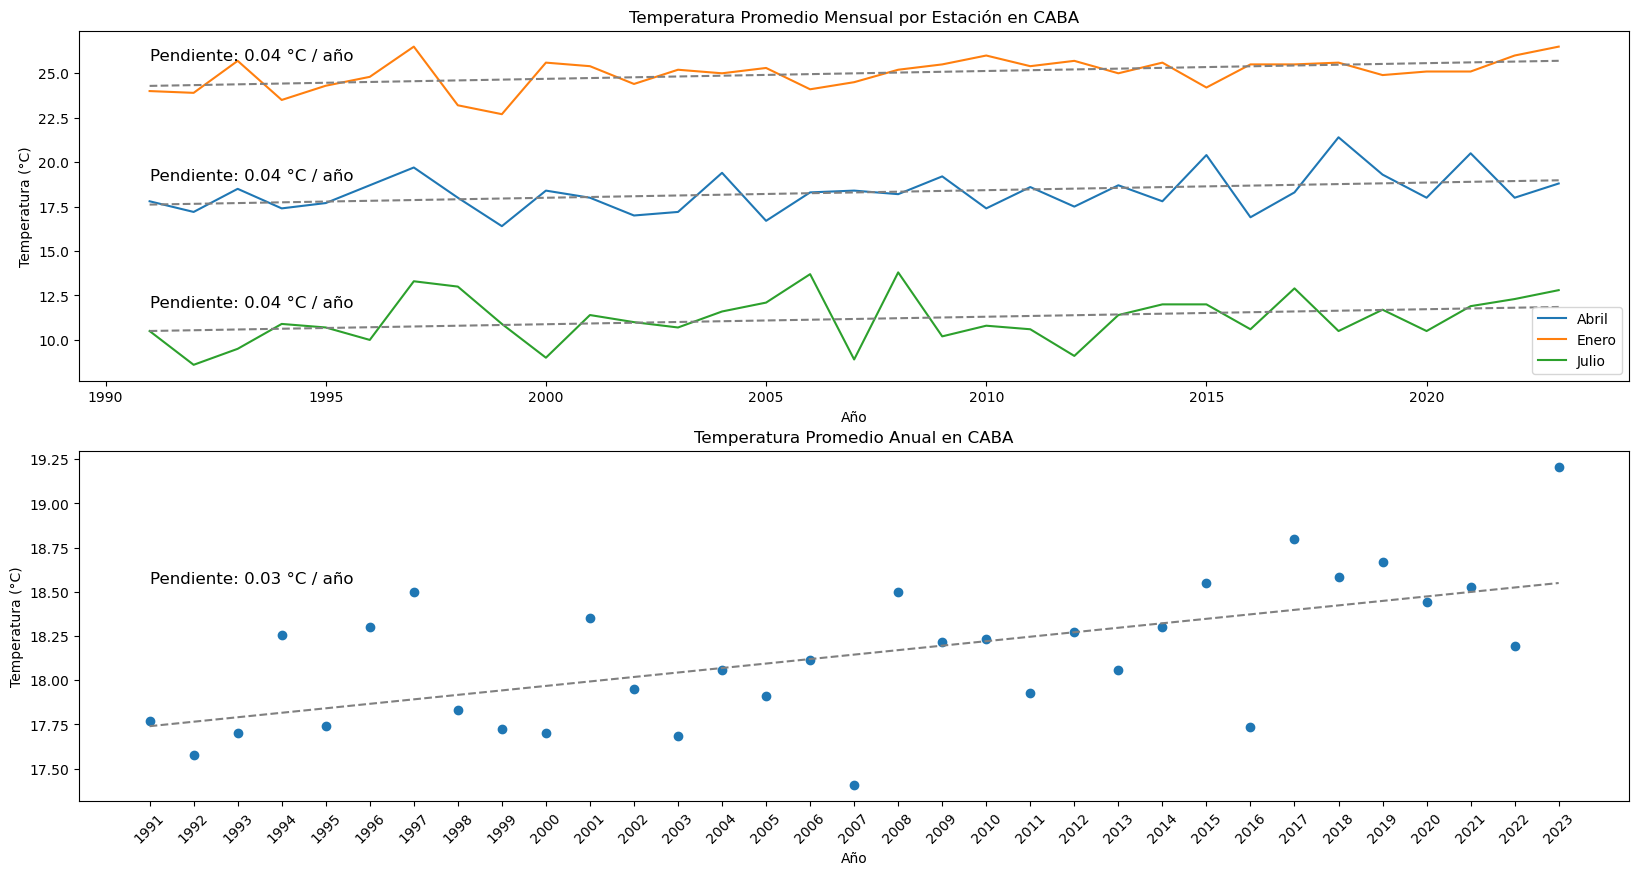

In [3]:
fig, axis = plt.subplots(2, 1)
fig.set_size_inches(20, 10)

axis[0].set_title("Temperatura Promedio Mensual por Estación en CABA")
axis[0].set_ylabel("Temperatura (°C)")
axis[0].set_xlabel("Año")

past_temps = temperatures.loc[
    temperatures.index.get_level_values(0) != 2024
]  # Ignoro 2024 porque no esta completo.

target_months = ["Enero", "Abril", "Julio"]
for month, temp in past_temps.groupby("Month"):
    if month not in target_months:
        continue

    # Plot temperature series
    years = temp.index.get_level_values(0)
    axis[0].plot(years, temp["Temp"], label=month)

    # Plot linear regression
    reg_coef = np.polyfit(years, temp["Temp"], 1)
    regression = np.poly1d(reg_coef)
    xs = years
    ys = regression(years)
    axis[0].plot(xs, ys, linestyle="--", color="gray")
    axis[0].text(xs[0], ys[-1], f"Pendiente: {reg_coef[0]:.2f} °C / año", fontsize=12)

axis[0].legend()

axis[1].set_title("Temperatura Promedio Anual en CABA")
axis[1].set_ylabel("Temperatura (°C)")
axis[1].set_xlabel("Año")

mean_temps = past_temps.groupby("Year").mean()

# Plot mean temperatures
years = mean_temps.index.get_level_values(0)

axis[1].set_xticks(years)
axis[1].set_xticklabels(years, rotation=45)
axis[1].scatter(years, mean_temps["Temp"])

# Plot linear regression
reg_coef = np.polyfit(years, mean_temps["Temp"], 1)
regression = np.poly1d(reg_coef)
xs = years
ys = regression(years)
axis[1].plot(xs, ys, linestyle="--", color="gray")
axis[1].text(xs[0], ys[-1], f"Pendiente: {reg_coef[0]:.2f} °C / año", fontsize=12)

plt.show()

Graficamos la evolucion año a año de la temperatura para los meses de Enero, Abril y Julio.
Ya que estos meses se encuentran en distintas estaciones del año bien definidas.

<br>
Podemos observar una pequeña tendencia creciente de la temperatura de 0.03 °C por año.

### Evolution de la Humedad Promedio

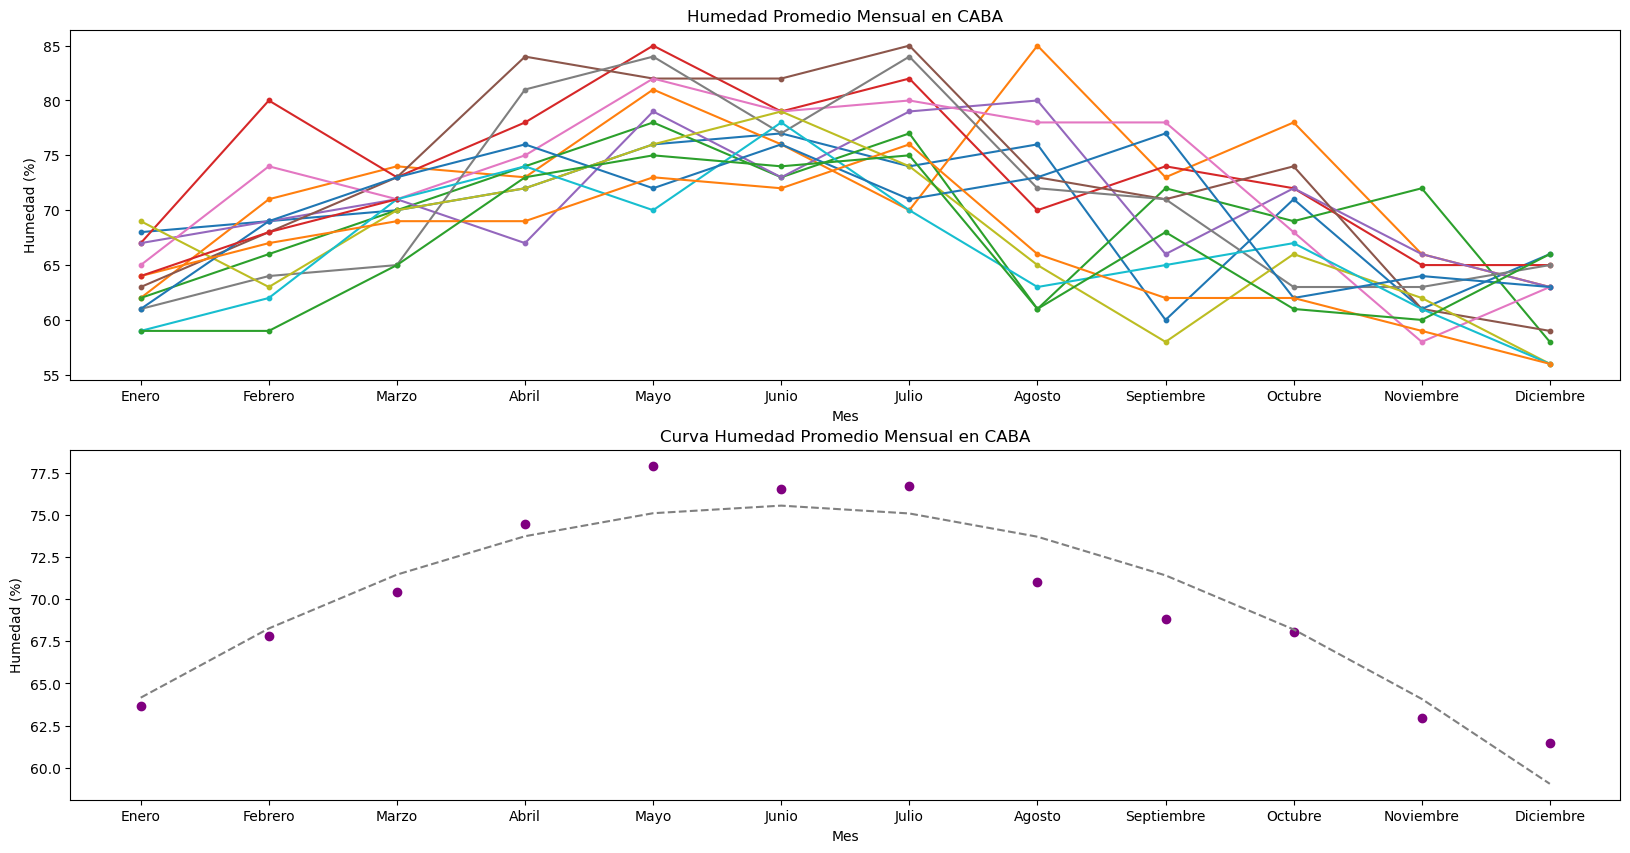

In [4]:
humidity = analysis_data[["HumMin", "HumMax", "HumMean"]]

fig, axis = plt.subplots(2, 1)
fig.set_size_inches(20, 10)

axis[0].set_title("Humedad Promedio Mensual en CABA")
axis[0].set_ylabel("Humedad (%)")
axis[0].set_xlabel("Mes")

means = pd.DataFrame(humidity["HumMean"]).dropna()
for year, hum in means.groupby("Year"):
    months = hum.index.get_level_values(1)
    axis[0].plot(months, hum["HumMean"], label=year)
    axis[0].scatter(months, hum["HumMean"], s=10)

axis[1].set_title("Curva Humedad Promedio Mensual en CABA")
axis[1].set_ylabel("Humedad (%)")
axis[1].set_xlabel("Mes")

months = means.index.get_level_values(1).unique()
mean_avg = means.groupby("Month").mean().reindex(months)
axis[1].scatter(months, mean_avg["HumMean"], color="purple")

reg_coef = np.polyfit(range(1, 13), mean_avg["HumMean"], 2)
regression = np.poly1d(reg_coef)
axis[1].plot(months, regression(range(1, 13)), linestyle="--", color="gray")

plt.show()

Del gráfico, podemos observar cómo la humedad promedio encuentra su punto máximo en los meses de menor temperatura.